In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
caracteristicas = pd.read_csv("drive/MyDrive/pos-graduacao/curso/15. TCC/caracP50.csv")
caracteristicas['count'] = 1
caracteristicas.head()

,NUMEROPT,CARACTERISTICA,count
0,1/2020,Pressurizado,1
1,16/2020,Pressurizado,1
2,24/2020,Pressurizado,1
3,27/2020,Risco de Perda de Produção,1
4,37/2020,Pressurizado,1


In [4]:
caracteristicasfinal = caracteristicas.pivot_table(index=["NUMEROPT"], 
            columns=['CARACTERISTICA'], values='count').fillna(0)
caracteristicasfinal.shape

(6763, 33)

In [5]:
epiData = pd.read_csv("drive/MyDrive/pos-graduacao/curso/15. TCC/epiP50.csv")
epiData['count'] = 1
epiData.head()

,NUMEROPT,EPI,count
0,4/2020,ÓCULOS SEGURANÇA CONTRA IMPACTO,1
1,6/2020,"EPI´s OBRIGATÓRIOS (CAPACETE, BOTA, PROT. AURI...",1
2,8/2020,ÓCULOS PROTETOR FACIAL,1
3,8/2020,"EPI´s OBRIGATÓRIOS (CAPACETE, BOTA, PROT. AURI...",1
4,11/2020,"EPI´s OBRIGATÓRIOS (CAPACETE, BOTA, PROT. AURI...",1


In [6]:
epipivot = epiData.pivot_table(index=["NUMEROPT"], 
            columns=['EPI'], values='count').fillna(0)
epipivot.shape

(9517, 120)

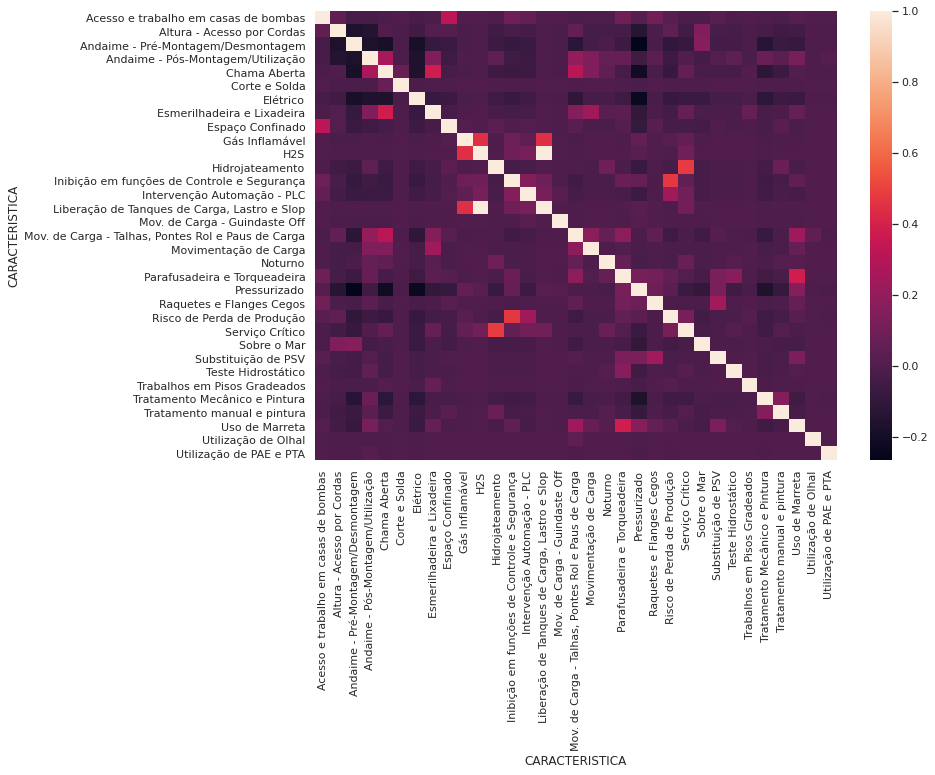

In [7]:
#seaborn correlação de caracterisicas de trabalho
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
corr = caracteristicasfinal.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

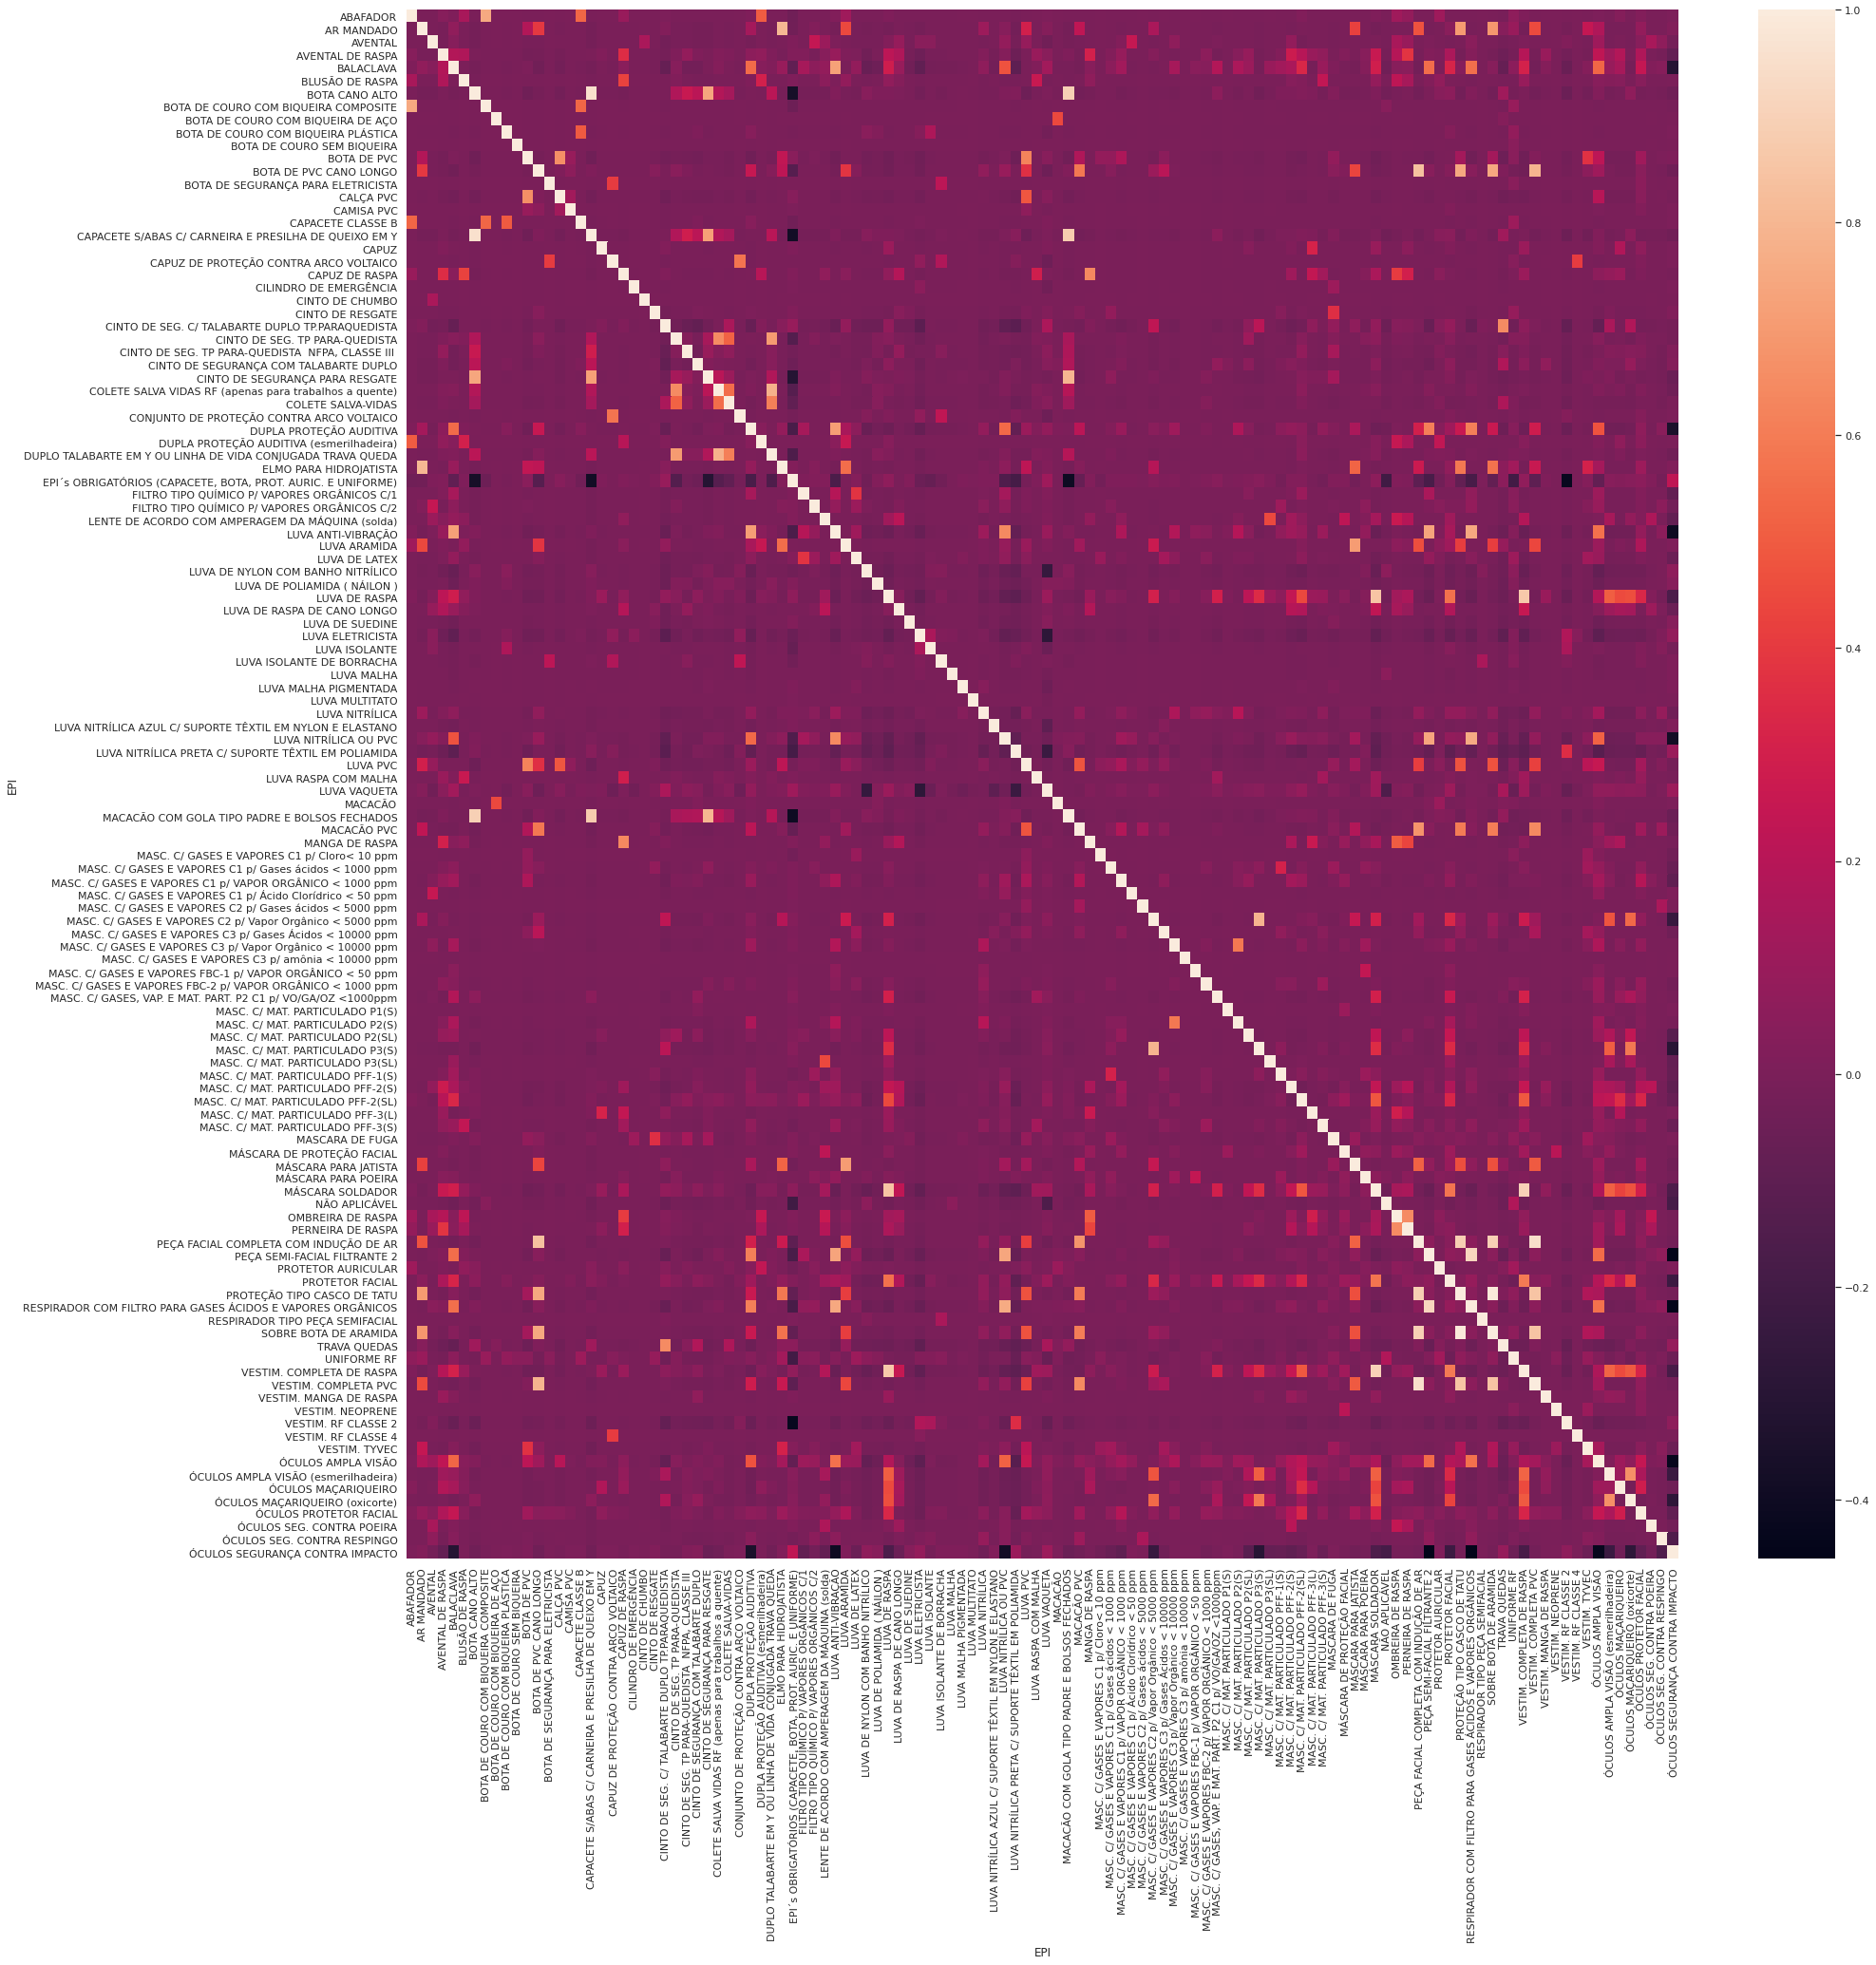

In [8]:
#seaborn correlação de caracterisicas de trabalho
import seaborn as sns
sns.set(rc={'figure.figsize':(30,30)})
corr = epipivot.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [9]:
#A correlação linear pode remover colunas e melhorar desempenho
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model 
        to generalize and improves the interpretability of the model.

    Inputs: 
        x: features dataframe
        threshold: features with correlations greater than this value are removed

    Output: 
        dataframe that contains only the non-highly-collinear features
    '''

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)

    return x

In [10]:
#houve remoção de apenas uma coluna
caracteristicacorr = remove_collinear_features(caracteristicasfinal, 0.8)
caracteristicacorr.shape

Liberação de Tanques de Carga, Lastro e Slop | H2S | 1.0


(6763, 32)

In [11]:
epicorr = remove_collinear_features(epipivot, 0.8)
epicorr.shape

CAPACETE S/ABAS C/ CARNEIRA E PRESILHA DE QUEIXO EM Y | BOTA CANO ALTO | 0.95
ELMO PARA HIDROJATISTA | AR MANDADO | 0.8
MACACÃO COM GOLA TIPO PADRE E BOLSOS FECHADOS | BOTA CANO ALTO | 0.89
MACACÃO COM GOLA TIPO PADRE E BOLSOS FECHADOS | CAPACETE S/ABAS C/ CARNEIRA E PRESILHA DE QUEIXO EM Y | 0.88
MÁSCARA SOLDADOR | LUVA DE RASPA | 0.85
PEÇA FACIAL COMPLETA COM INDUÇÃO DE AR | BOTA DE PVC CANO LONGO | 0.84
PROTEÇÃO TIPO CASCO DE TATU | PEÇA FACIAL COMPLETA COM INDUÇÃO DE AR | 0.89
RESPIRADOR COM FILTRO PARA GASES ÁCIDOS E VAPORES ORGÂNICOS | PEÇA SEMI-FACIAL FILTRANTE 2 | 0.92
SOBRE BOTA DE ARAMIDA | PEÇA FACIAL COMPLETA COM INDUÇÃO DE AR | 0.9
SOBRE BOTA DE ARAMIDA | PROTEÇÃO TIPO CASCO DE TATU | 0.99
VESTIM. COMPLETA DE RASPA | LUVA DE RASPA | 0.87
VESTIM. COMPLETA DE RASPA | MÁSCARA SOLDADOR | 0.9
VESTIM. COMPLETA PVC | PEÇA FACIAL COMPLETA COM INDUÇÃO DE AR | 0.95
VESTIM. COMPLETA PVC | PROTEÇÃO TIPO CASCO DE TATU | 0.85
VESTIM. COMPLETA PVC | SOBRE BOTA DE ARAMIDA | 0.85


(9517, 110)

In [12]:
epicorr.columns

Index(['ABAFADOR', 'AR MANDADO', 'AVENTAL', 'AVENTAL DE RASPA', 'BALACLAVA',
       'BLUSÃO DE RASPA', 'BOTA CANO ALTO',
       'BOTA DE COURO COM BIQUEIRA COMPOSITE',
       'BOTA DE COURO COM BIQUEIRA DE AÇO',
       'BOTA DE COURO COM BIQUEIRA PLÁSTICA',
       ...
       'VESTIM. RF CLASSE 4', 'VESTIM. TYVEC', 'ÓCULOS AMPLA VISÃO',
       'ÓCULOS AMPLA VISÃO (esmerilhadeira)', 'ÓCULOS MAÇARIQUEIRO',
       'ÓCULOS MAÇARIQUEIRO (oxicorte)', 'ÓCULOS PROTETOR FACIAL',
       'ÓCULOS SEG. CONTRA POEIRA', 'ÓCULOS SEG. CONTRA RESPINGO',
       'ÓCULOS SEGURANÇA CONTRA IMPACTO'],
      dtype='object', name='EPI', length=110)

In [13]:
oculosdf = epicorr.filter(like='ÓCULO')
oculosdf = oculosdf.iloc[:, 0:6]
oculosdf.head()

EPI,ÓCULOS AMPLA VISÃO,ÓCULOS AMPLA VISÃO (esmerilhadeira),ÓCULOS MAÇARIQUEIRO,ÓCULOS MAÇARIQUEIRO (oxicorte),ÓCULOS PROTETOR FACIAL,ÓCULOS SEG. CONTRA POEIRA
NUMEROPT,,,,,,
10/2020,0.0,0.0,0.0,0.0,0.0,0.0
100/2020,0.0,0.0,0.0,0.0,0.0,0.0
1000/2020,0.0,0.0,0.0,0.0,0.0,0.0
10000/2020,0.0,0.0,0.0,0.0,0.0,0.0
10001/2020,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
oculosdf['OCULOS'] = oculosdf[:].max(axis=1)
oculosdf['OCULOS'].value_counts()
saida = oculosdf.filter(like='OCULO')
saida.shape

(9517, 1)

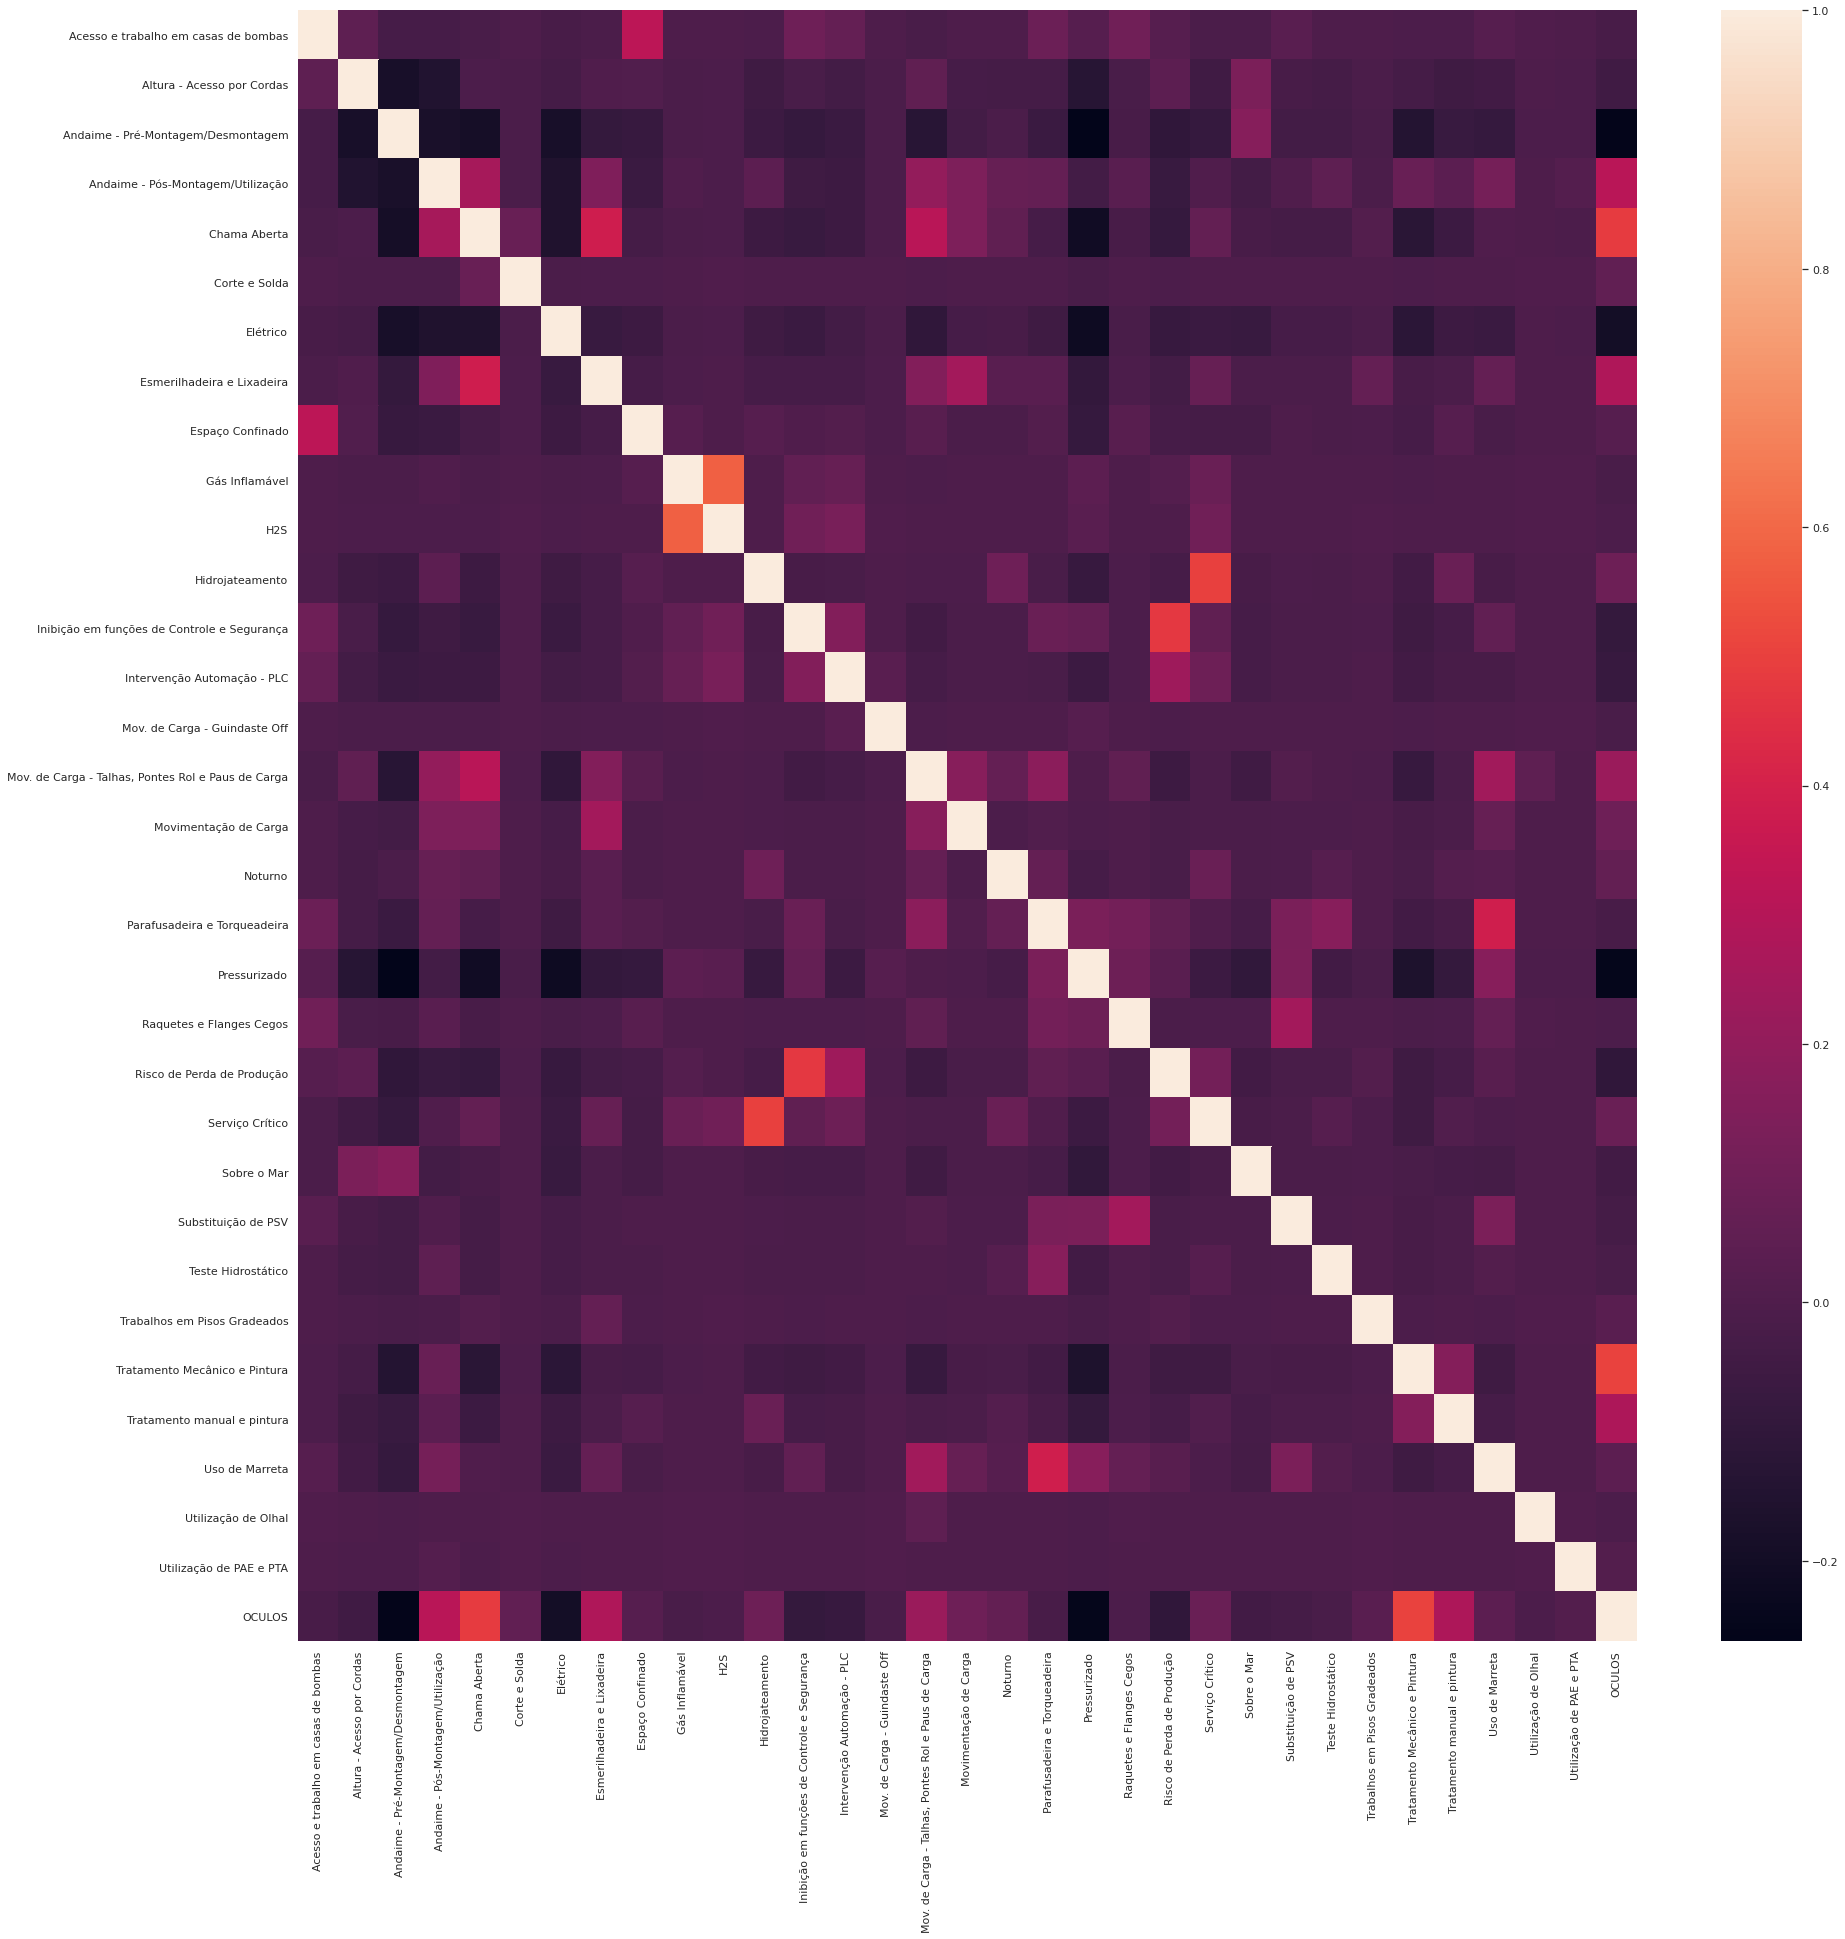

In [15]:
result = pd.merge(caracteristicacorr, saida, on="NUMEROPT")
sns.set(rc={'figure.figsize':(30,30)})
corrsaida = result.corr()
sns.heatmap(corrsaida, 
            xticklabels=corrsaida.columns.values,
            yticklabels=corrsaida.columns.values)


In [16]:
entrada = result[result.columns[:-1]]
entrada.head()

,Acesso e trabalho em casas de bombas,Altura - Acesso por Cordas,Andaime - Pré-Montagem/Desmontagem,Andaime - Pós-Montagem/Utilização,Chama Aberta,Corte e Solda,Elétrico,Esmerilhadeira e Lixadeira,Espaço Confinado,Gás Inflamável,H2S,Hidrojateamento,Inibição em funções de Controle e Segurança,Intervenção Automação - PLC,Mov. de Carga - Guindaste Off,"Mov. de Carga - Talhas, Pontes Rol e Paus de Carga",Movimentação de Carga,Noturno,Parafusadeira e Torqueadeira,Pressurizado,Raquetes e Flanges Cegos,Risco de Perda de Produção,Serviço Crítico,Sobre o Mar,Substituição de PSV,Teste Hidrostático,Trabalhos em Pisos Gradeados,Tratamento Mecânico e Pintura,Tratamento manual e pintura,Uso de Marreta,Utilização de Olhal,Utilização de PAE e PTA
NUMEROPT,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100/2020,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10000/2020,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10001/2020,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10005/2020,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
#preparando a rede neural
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

In [66]:
from sklearn.model_selection import train_test_split
#Create train and test dataset with an 80:20 split

x_train, x_test, y_train, y_test = train_test_split(entrada,result['OCULOS'],test_size=0.2)
#Further divide training dataset into train and validation dataset with an 90:10 split
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.1)
#Check the sizes of all newly created datasets
print("Shape of x_train:",x_train.shape)
print("Shape of x_val:",x_val.shape)
print("Shape of x_test:",x_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_val:",y_val.shape)
print("Shape of y_test:",y_test.shape)

Shape of x_train: (4535, 32)
Shape of x_val: (504, 32)
Shape of x_test: (1260, 32)
Shape of y_train: (4535,)
Shape of y_val: (504,)
Shape of y_test: (1260,)


In [70]:
#Create Deep Neural Network Architecture
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import History
from keras.layers.core import Dropout, Dense

history = History()

model = Sequential()
model.add(Dense(3, activation='relu', input_shape=(32,)))
model.add(Dense(3, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#Configure the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
#Train the model
model.fit(x_train.values,y_train.values, validation_data=(x_val,y_val),epochs=5,batch_size=32,callbacks=[history])

Epoch 1/5
142/142 [==============================] - 1s 3ms/step - loss: 0.5979 - accuracy: 0.8118 - val_loss: 0.4700 - val_accuracy: 0.8591
Epoch 2/5
142/142 [==============================] - 0s 1ms/step - loss: 0.4171 - accuracy: 0.8948 - val_loss: 0.3147 - val_accuracy: 0.9067
Epoch 3/5
142/142 [==============================] - 0s 1ms/step - loss: 0.2991 - accuracy: 0.9078 - val_loss: 0.2480 - val_accuracy: 0.9286
Epoch 4/5
142/142 [==============================] - 0s 1ms/step - loss: 0.2524 - accuracy: 0.9203 - val_loss: 0.2212 - val_accuracy: 0.9325
Epoch 5/5
142/142 [==============================] - 0s 1ms/step - loss: 0.2408 - accuracy: 0.9187 - val_loss: 0.2082 - val_accuracy: 0.9325


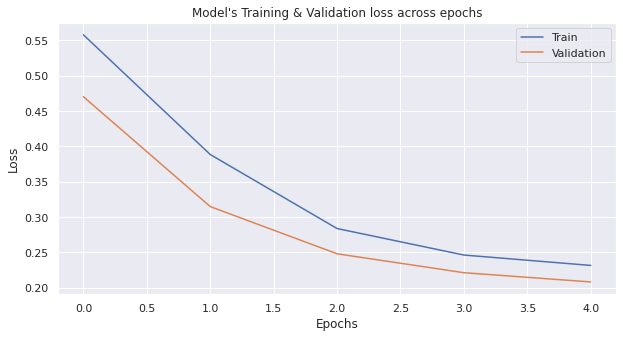

In [71]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model's Training & Validation loss across epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

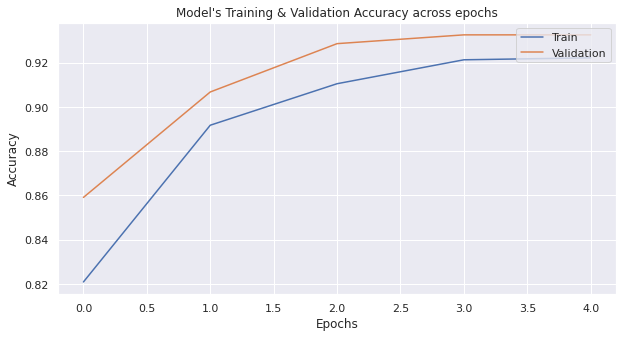

In [72]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title("Model's Training & Validation Accuracy across epochs")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()